In [1]:
#This report is world development index report by World Bank
#Data source - http://data.worldbank.org/data-catalog/world-development-indicators

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
country = pd.read_csv('Country.csv')
country_notes = pd.read_csv('CountryNotes.csv')
indicators = pd.read_csv('Indicators.csv')

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


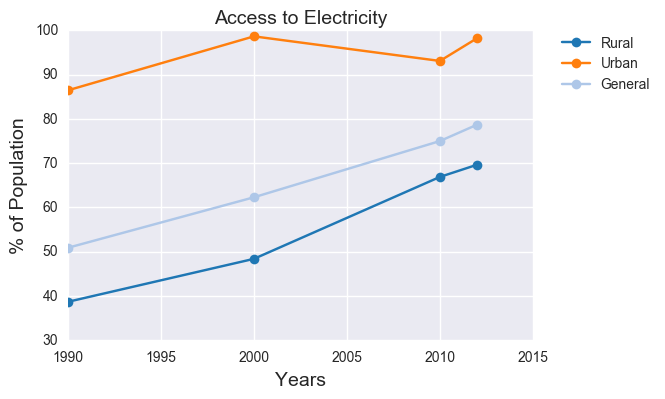

In [3]:
#Checking access to electricity in India 

df_elec_rural = indicators[(indicators['CountryName'] == 'India') & (indicators['IndicatorCode'] == 'EG.ELC.ACCS.RU.ZS')]
df_elec_urban = indicators[(indicators['CountryName'] == 'India') & (indicators['IndicatorCode'] == 'EG.ELC.ACCS.UR.ZS')]
df_elec_pop = indicators[(indicators['CountryName'] == 'India') & (indicators['IndicatorCode'] == 'EG.ELC.ACCS.ZS')]

fig = plt.figure()



plt.plot(df_elec_rural.Year,df_elec_rural.Value,'o-',label='Rural',color=tableau20[0])
plt.plot(df_elec_urban.Year,df_elec_urban.Value,'o-',label='Urban',color=tableau20[2])
plt.plot(df_elec_pop.Year,df_elec_pop.Value,'o-',label='General',color=tableau20[1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Population',  fontsize=14)
plt.title('Access to Electricity', fontsize=14)

fig.savefig('access_electricity.pdf',format='pdf', dpi=300)

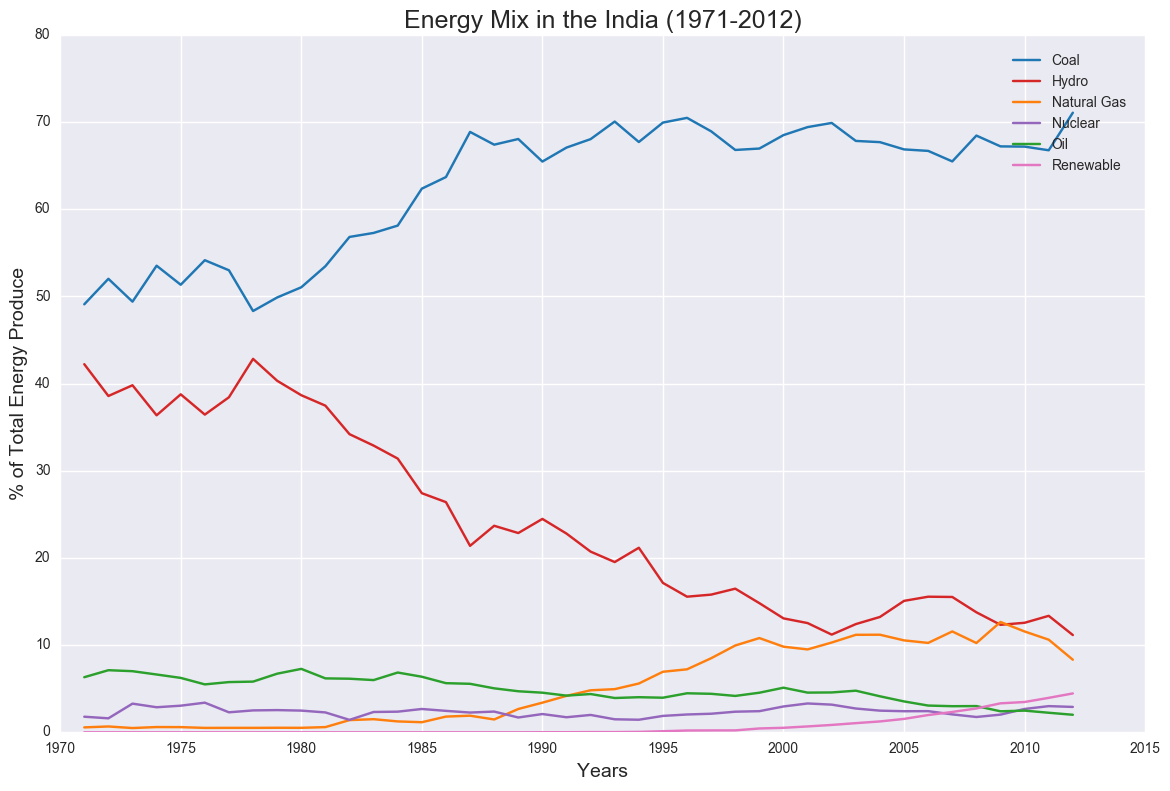

In [11]:
#Energy Mix in India


df_elec_coal = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.COAL.ZS')]
df_elec_hydro = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.HYRO.ZS')]
df_elec_ngas = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.NGAS.ZS')]
df_elec_nucl = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.NUCL.ZS')]
df_elec_oil = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.PETR.ZS')]
df_elec_rnwx = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]

figure = plt.figure()

plt.plot(df_elec_coal.Year , df_elec_coal.Value , label = 'Coal' , color= tableau20[0])
plt.plot(df_elec_hydro.Year , df_elec_hydro.Value , label = 'Hydro' , color= tableau20[6])
plt.plot(df_elec_ngas.Year , df_elec_ngas.Value , label = 'Natural Gas' , color= tableau20[2])
plt.plot(df_elec_nucl.Year , df_elec_nucl.Value , label = 'Nuclear' , color= tableau20[8])
plt.plot(df_elec_oil.Year , df_elec_oil.Value , label = 'Oil' , color= tableau20[4])
plt.plot(df_elec_rnwx.Year , df_elec_rnwx.Value , label = 'Renewable' , color= tableau20[12])

plt.rcParams['figure.figsize'] = [9,9]
plt.legend(loc=1, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Total Energy Produce',  fontsize=14)
plt.title('Energy Mix in the India (1971-2012)', fontsize=18)

fig.savefig('energy_mix.pdf',format='pdf', dpi=300)





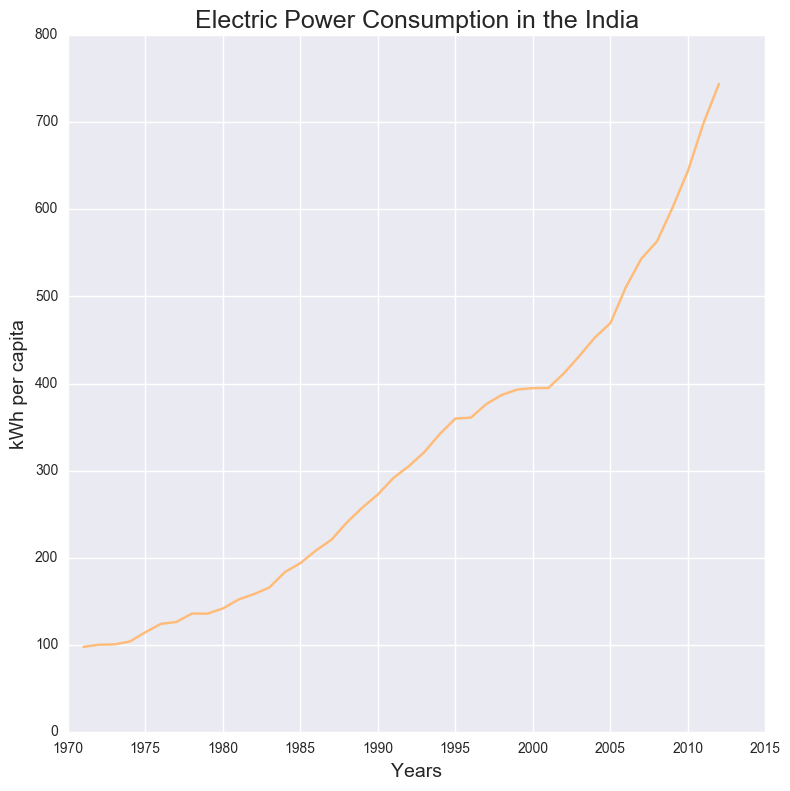

In [12]:
# It is clear from the statistics that the production of electricity using coal has been rising at 
#a greater pace than other sources.

#Hydroelectricity has been reduced as a source of electricity. Renewable sources has been increasing but the percentage still
#remains very low. This may be due to more demand for electricity and less available options for renewable sources.
#One good point is that electricity generation using natural gas and oil has been reduced .


#----------------------------------------------------------------------------------------------------------------------------
#Checking electric power consumption in India over time

df_elec_use = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]


fig = plt.figure()

plt.plot(df_elec_use.Year,df_elec_use.Value,color=tableau20[3])

#plt.legend(loc=4, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('kWh per capita',  fontsize=14)
plt.title('Electric Power Consumption in the India', fontsize=18)


fig.savefig('electric_consumption.pdf',format='pdf', dpi=300)
fig.savefig('electric_consumption.png',format='png', dpi=300)

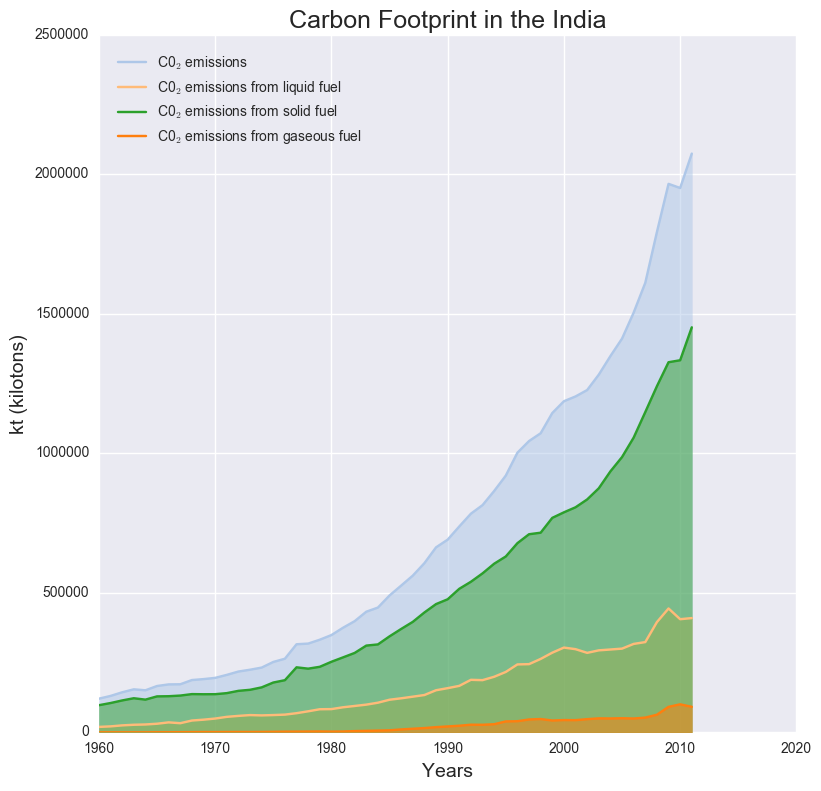

In [15]:
#It is known fact that the development index of a country depends on electricity consumption. A good growth is seen over the years

from pylab import fill_between

df_elec_emi = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EN.ATM.CO2E.KT')]
df_elec_gf = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EN.ATM.CO2E.GF.KT')]
df_elec_lf = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EN.ATM.CO2E.LF.KT')]
df_elec_sf = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EN.ATM.CO2E.SF.KT')]

fig = plt.figure()

plt.plot(df_elec_emi.Year,df_elec_emi.Value,label='C0$_2$ emissions',color=tableau20[1])
plt.plot(df_elec_lf.Year,df_elec_lf.Value,label='C0$_2$ emissions from liquid fuel',color=tableau20[3])
plt.plot(df_elec_sf.Year,df_elec_sf.Value,label='C0$_2$ emissions from solid fuel',color=tableau20[4])
plt.plot(df_elec_gf.Year,df_elec_gf.Value,label='C0$_2$ emissions from gaseous fuel',color=tableau20[2])

fill_between(df_elec_emi.Year,df_elec_emi.Value,0,alpha=0.5,color=tableau20[1])
fill_between(df_elec_lf.Year,df_elec_lf.Value,0,alpha=0.5,color=tableau20[3])
fill_between(df_elec_sf.Year,df_elec_sf.Value,0,alpha=0.5,color=tableau20[4])
fill_between(df_elec_gf.Year,df_elec_gf.Value,0,alpha=0.5,color=tableau20[2])

plt.legend(loc=2, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('kt (kilotons)',  fontsize=14)
plt.title('Carbon Footprint in the India', fontsize=18)


fig.savefig('co2_emissions.pdf',format='pdf', dpi=300)
fig.savefig('co2_emissions.png',format='png', dpi=300)